In [2]:
function I_sin(t, tau, I0)
    if t<0 || t>2*tau
        return 0
    end
    return I0*(sin(pi*t/(2*tau))).^2
end

I_sin (generic function with 1 method)

In [ ]:
I0=1.2e6/2 #amps
tau=240e-9 #seconds
t=255e-9 #seconds
A=12 #atomic mass units
Z=4 #effective ion charge
V=40e3 #in m/s
R0=8e-3 #radius of array
lamb=1053e-9#laser probing wavelength for Faraday, metres.

mu_0=4e-7*pi
m_p=1.67e-27

xs=linspace(-30e-3,30e-3,5000)# in metres, form is (minimum, maximum, number of points)
ys=linspace(10e-3,30e-3,5000)# in metres, form is (minimum, maximum, number of points)
ys=ys'
dx=xs[2]-xs[1] 
dy=ys[2]-ys[1]
R=sqrt(xs.^2.+ys.^2) #distance from centre of array to each point, m
ret_time=t-(R-R0)./V#retarded time taken to reach each point, seconds
I_ret=[I_sin(t, tau, I0) for t in ret_time]
I_ret=reshape(I_ret, 5000, 5000)
ne=I_ret.^2.*(mu_0*Z)./(8*pi^2*V^2*R0*R*A*m_p) #electron density, m^-3
B=mu_0/(2*pi*R0).*I_ret#magnetic field magnitude, T
th=atan(xs./ys)#angle between x axis and line from the radius
Bx=B.*ys./sqrt(xs.^2.+ ys.^2)

neL=1e-4*sum(ne, 1)*dx #line average electron density cm^-2
alpha=2.62e-13*lamb^2*sum(Bx.*ne, 1)*dx #rotation angle, radians
Bmax=Bx[size(ys)[2]/2,:] #peak magnetic field along any radial direction - this is what we are trying to extract
Bavg=3.4e20*alpha./neL #x component of magnetic field inferred by current analysis techniques.

In [20]:
PyPlot.subplots(figsize=(16,10))
plot(xs*1e3, B[y_ind,:], lw=5, color='k', label=L"B in tesla") #convert to degrees
plot(xs*1e3, ne[y_ind,:]/1e23,lw=5,color='b', label=L"n_e in \times 10^{17}\,cm^{-3}")
legend(fontsize=20)

set_xlabel(r'Distance along chord (mm)',fontsize=20)
set_ylabel('Density/Tesla',fontsize=20)
tick_params(labelsize=20, pad=5, length=10, width=2)

I0str=L'$I_0=$'+str(I0/1e6)+' MA, '
tstr=L'$t=$'+str(t*1e9)+' ns, '
Vstr=L'$V=$'+str(V/1e3)+' km/s, '
set_title('Model for '+I0str+tstr+Vstr, fontsize=30)

LoadError: y_ind not defined
while loading In[20], in expression starting on line 2

In [18]:
using LaTeXStrings

In [11]:
ax.plot

LoadError: type PyObject has no field plot
while loading In[11], in expression starting on line 1

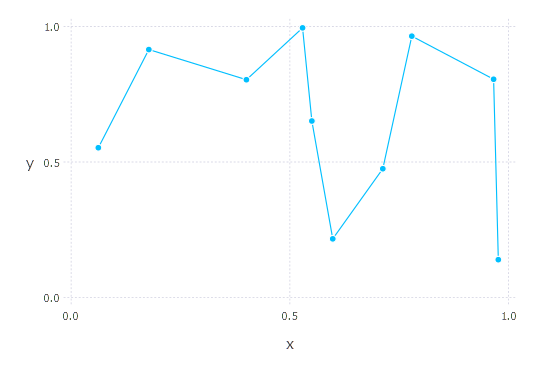

In [3]:
Gadfly.plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

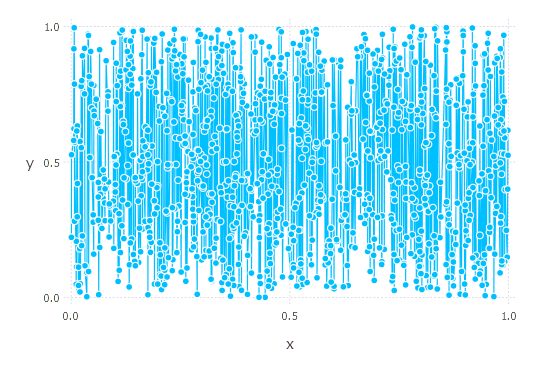

In [6]:
plot(x=rand(1000), y=rand(1000), Geom.point, Geom.line)

In [ ]:
y=2.^rand(200)
plot(x=1:200, y=y,
Geom.line, Geom.ribbon, ymin=y.^0.6, ymax=y.^1.5,
     Guide.xlabel("Stimulus"), Guide.ylabel("Response"), Guide.title("Dog Training"))